<a href="https://colab.research.google.com/github/yihaozhong/479_data_management/blob/main/Covariance_and_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read in some height and weight data for both genders from Kaggle
import pandas as pd
weight_height=pd.read_csv('/content/drive/MyDrive/weight-height.csv')

In [ ]:
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# recode Gender as a numerical flag which is 1 if female, 0 if male
weight_height['Female']=weight_height['Gender'].apply(lambda x: 1 if x=="Female" else 0)


In [ ]:
weight_height.tail()

,Gender,Height,Weight,Female
9995,Female,66.172652,136.777454,1
9996,Female,67.067155,170.867906,1
9997,Female,63.867992,128.475319,1
9998,Female,69.034243,163.852461,1
9999,Female,61.944246,113.649103,1


In [ ]:
weight_height.tail()

,Gender,Height,Weight,Female
9995,Female,66.172652,136.777454,1
9996,Female,67.067155,170.867906,1
9997,Female,63.867992,128.475319,1
9998,Female,69.034243,163.852461,1
9999,Female,61.944246,113.649103,1


In [ ]:
weight_height.describe()

,Height,Weight,Female
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,0.500000
std,3.847528,32.108439,0.500025
min,54.263133,64.700127,0.000000
25%,63.505620,135.818051,0.000000
50%,66.318070,161.212928,0.500000
75%,69.174262,187.169525,1.000000
max,78.998742,269.989699,1.000000


### Covariance

Covariance measures the extent to which two variables vary together. E is the expected value, which is the population mean. Intuitively, if each variable is on the same side of its mean at the same time as the other, they have a positive covariance, if they are are different sides, they have a negative covariance, and if they are unrelated, they have a covariance of zero or close to zero.

\begin{align}
  cov_{X,Y}=\frac{\sum_{i=1}^{N}(X_{i}-E(X))(Y_{i}-E(Y))}{N}
\end{align}


### Correlation

The magnitude of the covariance is hard to interpret and depends on the magnitudes of the variables in question. So in practice, people tend to use a normalized version of the covariance, which is the correlation coefficient. It has the same sign as the covariance, but ranges between -1 and +1. It is the covariance divided by the product of the standard deviations of the two variables.

\begin{align}
  \rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}
\end{align}


In [ ]:
corr=weight_height.corr()
corr

,Height,Weight,Female
Height,1.000000,0.924756,-0.691072
Weight,0.924756,1.000000,-0.796723
Female,-0.691072,-0.796723,1.000000


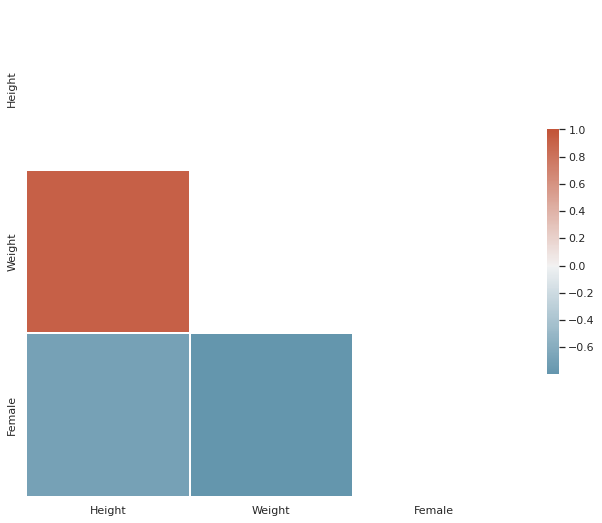

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

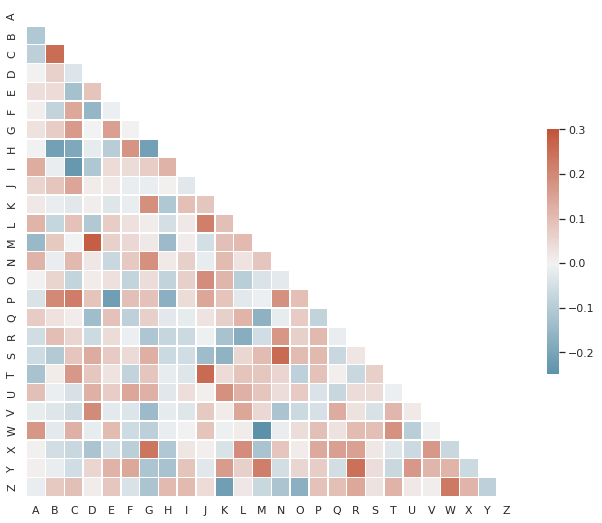

In [ ]:
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
from string import ascii_letters
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Note on the Boston housing prices dataset from Matt Zeidenberg

The Boston housing prices dataset (which I use below) has been used as a sample dataset in courses in data science and machine learning at many universities for a long time. I only recently became aware that there are some ethical issues surrounding these data. Now there is a warning when you load the dataset (see below) I haven't had time yet to consider these issues and to consider whether or not I want to replace this dataset with another one. It is possible that I will just keep using the database and use it as an occasion to discuss ethical issues in data science.

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


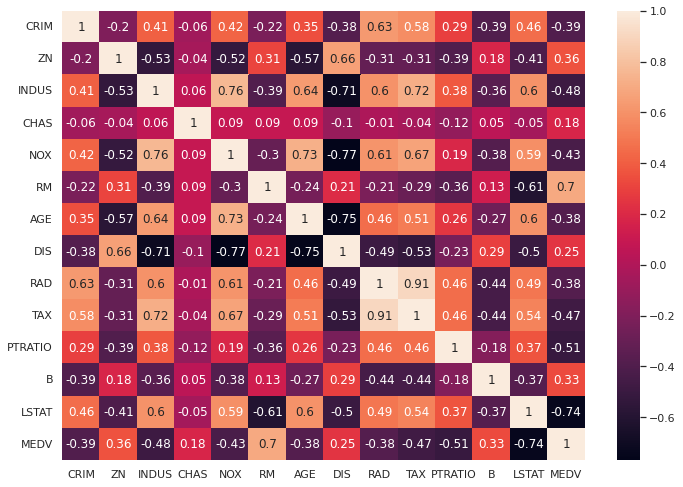

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate 
- PTRATIO: Pupil-teacher ratio by town
- B: A measure of how many African Americans are in the town; lower values mean more
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes